In [ ]:
pip install opendatasets

In [ ]:


import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import opendatasets as od

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kushagragoel1
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [01:44<00:00, 23.7MB/s]


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_dir = '/content/chest-xray-pneumonia/chest_xray/train'
test_dir = '/content/chest-xray-pneumonia/chest_xray/test'
validation_dir = '/content/chest-xray-pneumonia/chest_xray/val'

img_size = (224, 224)
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = VGG16(weights='imagenet', input_shape=(`), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = train_generator.samples // batch_size
if train_generator.samples % batch_size != 0:
    steps_per_epoch += 1

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)




Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/10
326/326 [==============================] - 134s 380ms/step - loss: 0.2346 - accuracy: 0.9225 - val_loss: 0.2197 - val_accuracy: 0.9375
Epoch 2/10
326/326 [==============================] - 117s 360ms/step - loss: 0.1254 - accuracy: 0.9563 - val_loss: 0.2678 - val_accuracy: 0.8125
Epoch 3/10
326/326 [==============================] - 115s 354ms/step - loss: 0.1010 - accuracy: 0.9630 - val_loss: 0.2411 - val_accuracy: 0.9375
Epoch 4/10
326/326 [==============================] - 114s 349ms/step - loss: 0.0925 - accuracy: 0.9659 - val_loss: 0.2103 - val_accuracy: 0.8750
Epoch 5/10
326/326 [==============================] - 114s 350ms/step - loss: 0.0904 - accuracy: 0.9668 - val_loss: 0.2714 - val_accuracy: 0.8750
Epoch 6/10
326/326 [==============================] - 116s 354ms/step - loss: 0.08

In [ ]:
model.save('pneumonia_detection_model.h5')

import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/39 [==============================] - 7s 160ms/step


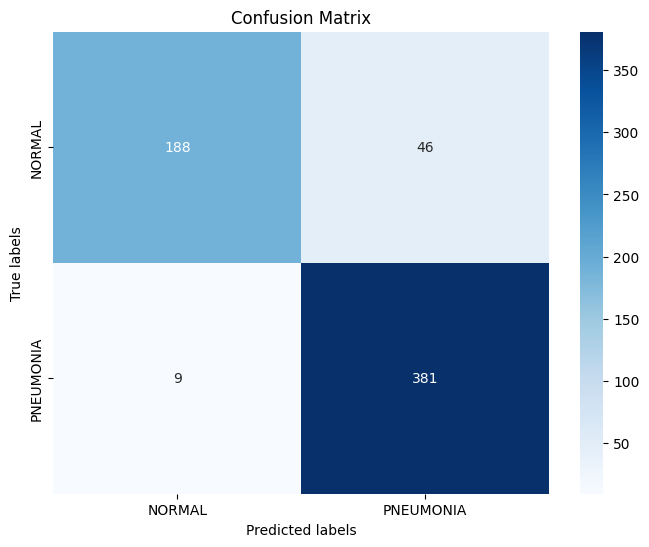

Test Accuracy: 0.9118589743589743


In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size)

predicted_classes = np.argmax(predictions, axis=-1)
true_classes = test_generator.classes

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print("Test Accuracy:", accuracy)

In [ ]:
predictions = model.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))
print("Predictions shape:", predictions.shape)

39/39 [==============================] - 5s 132ms/step
Predictions shape: (624, 2)


In [ ]:
from tensorflow.keras.applications import VGG19,InceptionV3, Xception
import tensorflow_hub as hub

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)



Found 624 images belonging to 2 classes.


In [ ]:
sample_count = 0
for _ in test_generator:
    sample_count += len(_[1])
    if sample_count >= test_generator.samples:
        break
print("Total samples from generator:", sample_count)

Total samples from generator: 624


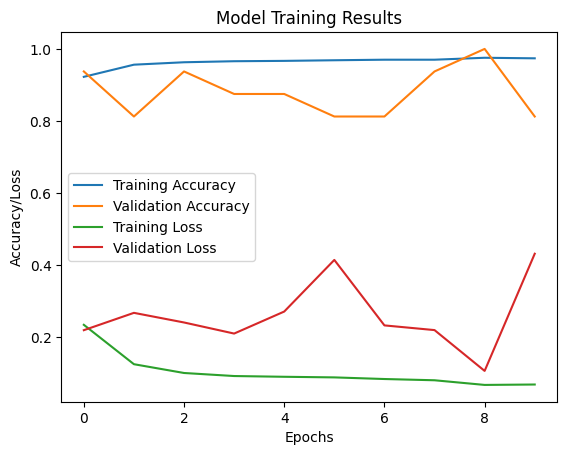

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Training Results')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')

plt.legend()

plt.show()


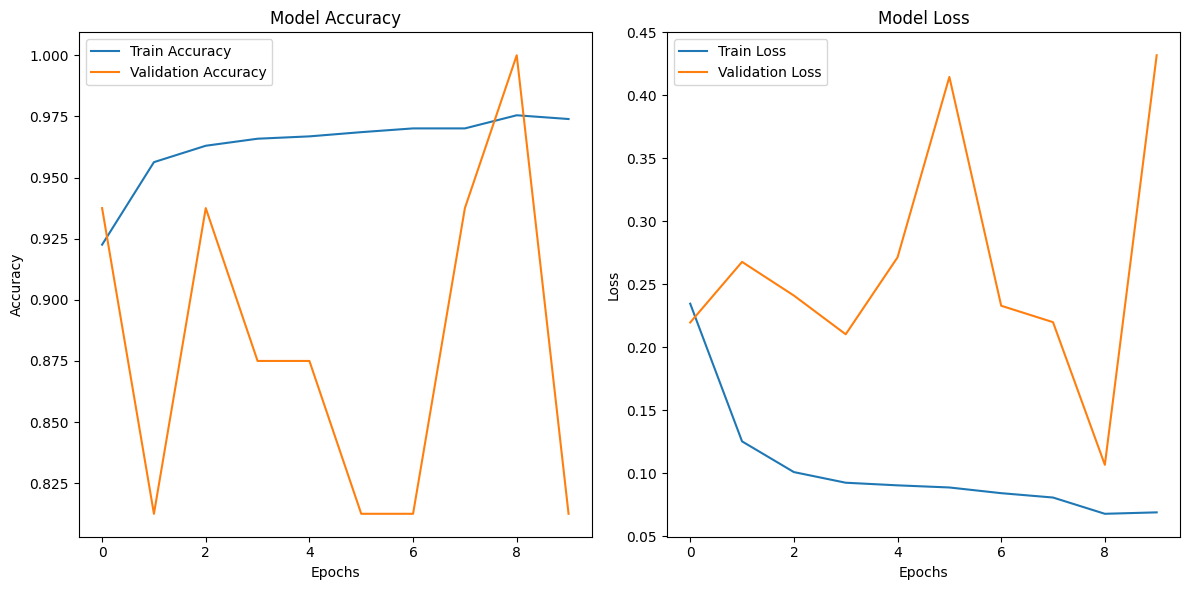

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


39/39 [==============================] - 5s 133ms/step


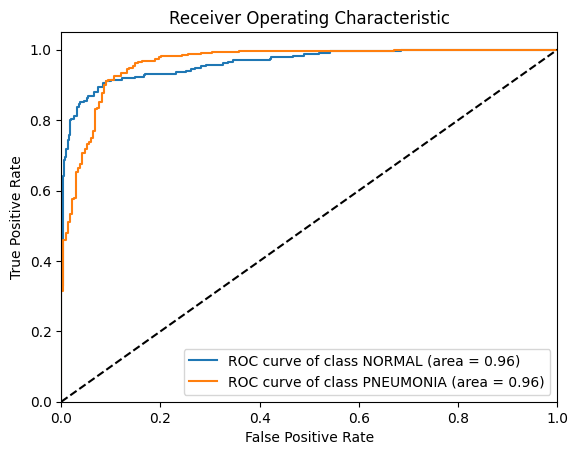

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict(test_generator)
y_true = test_generator.classes

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(test_generator.class_indices)):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()

for i, label in enumerate(test_generator.class_indices.keys()):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
np.unique(test_generator.classes)

array([0, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


39/39 [==============================] - 6s 154ms/step
Accuracy: 0.9118589743589743
Precision: 0.9155378095317348
Recall: 0.9118589743589743
F1 Score: 0.9100715082910427


#Input lung image and get prediction


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


model = load_model('/content/pneumonia_detection_model.h5')


def predict_pneumonia(image_path):

    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)


    predicted_class = np.argmax(prediction, axis=1)


    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    predicted_label = class_labels[predicted_class[0]]

    return predicted_label

image_path = '/content/pnemonia_image.jpg'
result = predict_pneumonia(image_path)
print(f"The image is predicted to be: {result}")

1/1 [==============================] - 1s 1s/step
The image is predicted to be: PNEUMONIA


#Deployment on Web app


In [ ]:

!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model_path = '/content/pneumonia_detection_model.h5'
model = load_model(model_path)


def predict_pneumonia(image):

    img = load_img(image, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.


    prediction = model.predict(img_array)

    predicted_class = np.argmax(prediction, axis=1)

    class_labels = {0: 'Normal', 1: 'Pneumonia'}
    predicted_label = class_labels[predicted_class[0]]

    return predicted_label

st.title("Pneumonia Classification")
st.header("Please upload a chest X-ray image")

uploaded_file = st.file_uploader("Choose a chest X-ray image...", type=['jpeg', 'jpg', 'png'])

if uploaded_file is not None:
    image = uploaded_file.read()
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")

    if st.button('Predict'):
        predicted_label = predict_pneumonia(uploaded_file)
        st.write(f"Predicted Class: {predicted_label}")

2024-05-03 09:51:44.964 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.87.43.95:8501

